# Neural Networks and Deep Learning for Text Classification 
Navyada Koshatwar
Github: navyada

##  1. Build a classifier to analyze the sentiment of reviews. Data is split into two folders: one with positive reviews, one with negative reviews

In [2]:
#necessary imports
from tensorflow import keras
import os
import numpy as np
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten

### 1.a)  Set up encoding: y = 1 for positive sentiments and y = −1 for negative sentiments. Remove the punctuation and numbers from the data. Text files 0-699 in each class are used for training and 700-999 are used for testing.


In [20]:
#set up positive test and train sets (punctuation removed)
directorypos = 'Data/pos'
postrain = []
postest = []
negtrain = []
negtest = []

punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~0123456789'''

for filename in os.listdir(directorypos):
    if int(filename[2:5]) <= 699:
        f = open("Data/pos/"+filename, 'r')
        f = f.read()
        for ele in f:
            if ele in punc: 
                f = f.replace(ele, "")
        postrain.append(f)
    else:
        f = open("Data/pos/"+filename, 'r')
        f = f.read()
        for ele in f:
            if ele in punc: 
                f = f.replace(ele, "")
        postest.append(f)

#set up negative test and train sets (punctuation removed)
directoryneg = 'Data/neg'
for filename in os.listdir(directoryneg):
    if int(filename[2:5]) <= 699:
        f = open("Data/neg/"+filename, 'r')
        f = f.read()
        for ele in f:
            if ele in punc: 
                f = f.replace(ele, "")
        negtrain.append(f)
    else:
        f = open("Data/neg/"+filename, 'r')
        f = f.read()
        for ele in f:
            if ele in punc: 
                f = f.replace(ele, "")
        negtest.append(f)



### 1.b) Printing out the number of unique words in the whole dataset

In [21]:
#attaching labels to the data to signify positive or negative
alldata = []
labels = []
for x in postrain:
    alldata.append(x)
    labels.append(1)
for x in negtrain:
    alldata.append(x)
    labels.append(-1)
for x in postest: 
    alldata.append(x)
    labels.append(1)
for x in negtest:
    alldata.append(x)
    labels.append(-1)

#using Tokenizer to count the unique words 
t = Tokenizer()
t.fit_on_texts(alldata)
print("Number of unique words:", len(t.word_index))


Number of unique words: 46829


In [22]:
#needed to convert the labels to 0 or 1 for future steps
sig_lab = []
for x in postrain:
    sig_lab.append(1)
for x in negtrain:
    sig_lab.append(0)
for x in postest:
    sig_lab.append(1)
for x in negtest:
    sig_lab.append(0)
sig_lab = np.array(sig_lab)

### 1.c) Found the average review length and the standard deviation of review lengths. 

In [23]:
length = []
for each in postrain:
    l = list(each.split())
    length.append(len(l))
for each in postest: 
    l = list(each.split())
    length.append(len(l))
for each in negtrain:
    l = list(each.split())
    length.append(len(l))
for each in negtest:
    l = list(each.split())
    length.append(len(l))
print("Average review length:", sum(length)/len(length))
print("Standard deviation:", np.std(length))

Average review length: 644.5415
Standard deviation: 285.0149351836672


### 1.c) Plot the histogram of review lengths

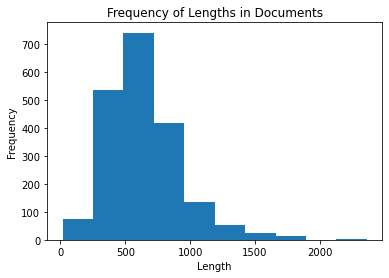

In [24]:

plt.hist(length)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Frequency of Lengths in Documents')
plt.show()


### 1.d)  Tokenize each text document using rank

In [25]:
train = alldata[0:1400]
test = alldata[1400:]
t = Tokenizer(5000)
t.fit_on_texts(train)
sequences = t.texts_to_sequences(train)
sequences_test = t.texts_to_sequences(test)

### 1.e) Select a review length L that 70% of the reviews have a length below it. 

In [26]:
lengthsorted = sorted(length)
print(lengthsorted[1399])

737


L = 737

### 1.f) Shape reviews so that they are all length L.

In [27]:
shaped_train_5000 = pad_sequences(sequences, maxlen = 737)
shaped_test_5000 = pad_sequences(sequences_test, maxlen = 737)

### 1.g) Created an embedding layer using the top 5000 words. Length of the embedding vector for each word is 32. Flatten the matrix of each document to a vector.

In [28]:
L = 737
top_words = 5001
max_words = L
embedding = Embedding(top_words, 32, input_length=max_words)
flatten = Flatten()

## Multi-Layer Perceptron
### 2. Train a MLP with three hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Set epochs to 2 to avoid overfitting. 

In [29]:
model = tf.keras.models.Sequential()
model.add(embedding)
model.add(flatten)

firstDense = tf.keras.layers.Dense(units=50, activation='relu')
model.add(firstDense)

firstDropout = tf.keras.layers.Dropout(.2)
model.add(firstDropout)

secondDense = tf.keras.layers.Dense(units=50, activation='relu')
model.add(secondDense)

nextDropout = tf.keras.layers.Dropout(.5)
model.add(nextDropout)

thirdDense = tf.keras.layers.Dense(units=50, activation='relu')
model.add(thirdDense)

model.add(nextDropout)

lastDense = tf.keras.layers.Dense(units=1, activation = 'sigmoid')
model.add(lastDense)

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
model.fit(shaped_train_5000, sig_lab[0:1400], epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 3s 15ms/step - loss: 0.6959 - accuracy: 0.5129
Epoch 2/2
140/140 [==============================] - 2s 15ms/step - loss: 0.6642 - accuracy: 0.5843


In [30]:
loss, acc = model.evaluate(shaped_train_5000, sig_lab[0:1400])
print("Train accuracy:", acc)

44/44 [==============================] - 0s 5ms/step - loss: 0.5142 - accuracy: 0.7586
Train accuracy: 0.758571445941925


In [31]:
loss, acc = model.evaluate(shaped_test_5000, sig_lab[1400:] )
print("Test accuracy", acc)

19/19 [==============================] - 0s 5ms/step - loss: 0.6756 - accuracy: 0.5717
Test accuracy 0.5716666579246521


In [32]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160032    
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2

## One Dimensional Convolutional Neural Network. 

### 3. Inserted a Conv1D layer after the embedding layer. This convolutional layer has 32 feature maps with kernel size of 3. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2. The rest of the network is the same as the neural network above.


In [33]:
model = tf.keras.models.Sequential()
L = 737
top_words = 5001
max_words = L
#shaped_train_5000 = np.where(shaped_train > 5000, 0, shaped_train)
embedding = Embedding(top_words, 32, input_length=max_words)
conv1d = tf.keras.layers.Conv1D(32, 3)
maxpool = tf.keras.layers.MaxPooling1D(2)
flatten = Flatten()
model.add(embedding)
model.add(conv1d)
model.add(maxpool)
model.add(flatten)


firstDense = tf.keras.layers.Dense(units=50, activation='relu')
model.add(firstDense)
firstDropout = tf.keras.layers.Dropout(.2)
model.add(firstDropout)
secondDense = tf.keras.layers.Dense(units=50, activation='relu')
model.add(secondDense)
nextDropout = tf.keras.layers.Dropout(.5)
model.add(nextDropout)
thirdDense = tf.keras.layers.Dense(units=50, activation='relu')
model.add(thirdDense)
model.add(nextDropout)
lastDense = tf.keras.layers.Dense(units=1, activation = 'sigmoid')
model.add(lastDense)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = 'accuracy')
sig_lab = np.array(sig_lab)
model.fit(shaped_train_5000, sig_lab[0:1400], epochs=2, batch_size=10)

Epoch 1/2
140/140 [==============================] - 4s 20ms/step - loss: 0.7004 - accuracy: 0.4907
Epoch 2/2
140/140 [==============================] - 2s 17ms/step - loss: 0.6871 - accuracy: 0.5521


In [34]:
loss, acc = model.evaluate(shaped_train_5000, sig_lab[0:1400])
print("Train accuracy:", acc)

44/44 [==============================] - 0s 7ms/step - loss: 0.6208 - accuracy: 0.8693
Train accuracy: 0.8692857027053833


In [35]:
loss, acc = model.evaluate(shaped_test_5000, sig_lab[1400:] )
print("Test accuracy", acc)

19/19 [==============================] - 0s 7ms/step - loss: 0.6727 - accuracy: 0.6867
Test accuracy 0.6866666674613953


## Long Short-Term Memory Recurrent Neural Network

### 4. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. 

In [ ]:
model = tf.keras.models.Sequential()
embedding = Embedding(top_words, 32, input_length=max_words)
model.add(embedding)
lstm = tf.keras.layers.LSTM(32)
model.add(lstm)
firstDropout = tf.keras.layers.Dropout(.2)
model.add(firstDropout)
firstDense = tf.keras.layers.Dense(units=256, activation='relu')
model.add(firstDense)
model.add(firstDropout)
lastDense = tf.keras.layers.Dense(units=1, activation = 'sigmoid')
model.add(lastDense)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(shaped_train_5000, sig_lab[0:1400], epochs=20, batch_size=10)

Epoch 1/20
140/140 [==============================] - 30s 198ms/step - loss: 0.6944 - accuracy: 0.5200
Epoch 2/20
140/140 [==============================] - 27s 192ms/step - loss: 0.5311 - accuracy: 0.7429
Epoch 3/20
  4/140 [..............................] - ETA: 32s - loss: 0.1494 - accuracy: 1.0000

In [43]:
loss, acc = model.evaluate(shaped_train_5000, sig_lab[0:1400])
print("Train accuracy:", acc)

44/44 [==============================] - 4s 73ms/step - loss: 9.4192e-06 - accuracy: 1.0000
Train accuracy: 1.0


In [44]:
loss, acc = model.evaluate(shaped_test_5000, sig_lab[1400:] )
print("Test accuracy", acc)

19/19 [==============================] - 1s 76ms/step - loss: 1.5393 - accuracy: 0.7867
Test accuracy 0.7866666913032532


References:  
https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
https://www.w3schools.com/python/python_file_open.asp  
https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do  
https://medium.com/geekculture/nlp-with-tensorflow-keras-explanation-and-tutorial-cae3554b1290  
https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce  
https://stackoverflow.com/questions/40050397/deep-learning-nan-loss-reasons  
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/  


